In [256]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import datetime as dt

In [257]:
#Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [258]:
data = pd.read_csv('R1Final_dataset(cleaned).csv',encoding = "ISO-8859-1")

In [259]:
data.shape

(9006, 37)

In [260]:
data.head()

,Emp code,Employee Name,Designation,Process,COE(Decision yet to be taken),Date Of Joining,Cleaned_Date Of Joining(Epoch time stamp),Date of Resignation(derivation needed),Date of Attrition(derivation needed),LWD(derivation needed),LWD_Epoch_timestamp,Tenure(derivation needed),Pre joining exp,Fresher,Previous Company,Graduation_Cleaned,Post Graduation_cleaned,Diploma_cleaned,Others_cleaned,Raw Master Category_cleaned,Notice period served,Voluntary / Forced,Gender,Rating,Band,Company,Business,toatl leave,Total leaves in last 3 months,Interim Manager,Last Shifts for person,No.of Transfers,Deparment,Permanent Address,Perm_Latitude(Model inclusion not permitted),Perm_Longitude(Model inclusion not permitted),Date.of.Attrition(clean)
0,400001123,Sswvtz Pzwznr,Finance Controller,Finance,Rzqvss psznnz,2/14/2007,1.171411e+09,NaN,8/31/2007 0:00,8/31/2007,1188518400,155.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Personal,0,NaN,F,NaN,A2,R1 RCM India,Support,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Support,"P3B â 106 Princeton Estate, DLF Phase Five ...",28.447799,77.095438,8/31/2007
1,400005123,zwrtr yzqzq,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,2/12/2008 0:00,2/22/2008,1203638400,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Health,0,NaN,F,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...",28.604539,77.053158,2/12/2008
2,400006123,zssrss nvstz,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,9/9/2007 0:00,9/7/2007,1189123200,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"A-80, Palam Vihar 0 Phone: Mobile:9.911...",28.513878,77.023693,9/9/2007
3,400007123,zqzy Przszw,Analyst,Underpayments,NaN,3/7/2007,1.173226e+09,NaN,1/7/2007 0:00,6/30/2007,1183161600,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"293/2 WAC, Subroto Park 0 Phone: Mobile...",28.579781,77.151392,1/7/2007
4,400009123,Runrt Srnts,Assistant Manager,Quality,zssrss punzr zttzrwzo,3/5/2007,1.173053e+09,4/10/2011 0:00,5/4/2011 0:00,5/2/2011,1304294400,154.0,NaN,1,NaN,No details,No details,no details,no details,No data available,0,V,M,NaN,P1,R1 RCM India,Quality,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Quality,"320 â D, J & K Pocket, Dilshad Garden 0 ...",28.681713,77.325981,5/4/2011


In [261]:
data.dtypes

Emp code                                           int64
Employee Name                                     object
Designation                                       object
Process                                           object
COE(Decision yet to be taken)                     object
Date Of Joining                                   object
Cleaned_Date Of Joining(Epoch time stamp)        float64
Date of Resignation(derivation needed)            object
Date of Attrition(derivation needed)              object
LWD(derivation needed)                            object
LWD_Epoch_timestamp                                int64
Tenure(derivation needed)                        float64
Pre joining exp                                  float64
Fresher                                           object
Previous Company                                  object
Graduation_Cleaned                                object
Post Graduation_cleaned                           object
Diploma_cleaned                

In [262]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,percent_missing
Rating,71.441261
Previous Company,19.187209
Pre joining exp,18.809682
Perm_Longitude(Model inclusion not permitted),9.171663
Perm_Latitude(Model inclusion not permitted),9.171663
Date of Resignation(derivation needed),8.238952
Permanent Address,7.006440
Voluntary / Forced,6.706640
Diploma_cleaned,6.706640
Others_cleaned,6.684433


### As we see, rating which is one of the most important attribute has about 70% of it's data missing!

#### > We will initially continue to find trends, where ratings are available.

In [263]:
data_rating = data[data['Rating'].notnull()]

In [264]:
data_rating.shape

(2572, 37)

### As we see, we suddenly lost about 70% of our total data!

###### Rating vs Band

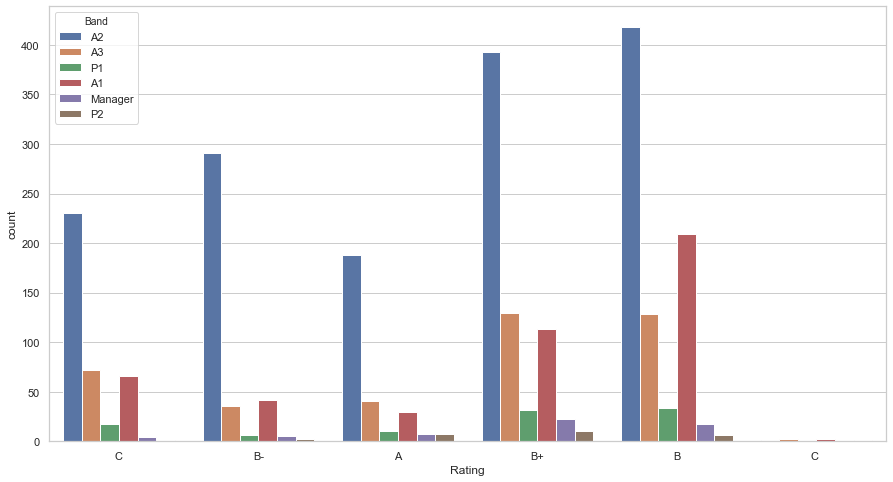

In [265]:
plt.subplots(figsize=(15,8)) 
sns.set(style="whitegrid")
ax = sns.countplot(x='Rating',hue='Band',  data=data_rating)
plt.show()

In [266]:
#Configuration
A1 = data[data['Band']=='A1']
A2 = data[data['Band']=='A2']
A3 = data[data['Band']=='A3']
Manager = data[data['Band']=='Manager']
P1 = data[data['Band']=='P1']
P2 = data[data['Band']=='P2']

Text(0, 0.5, 'Count')

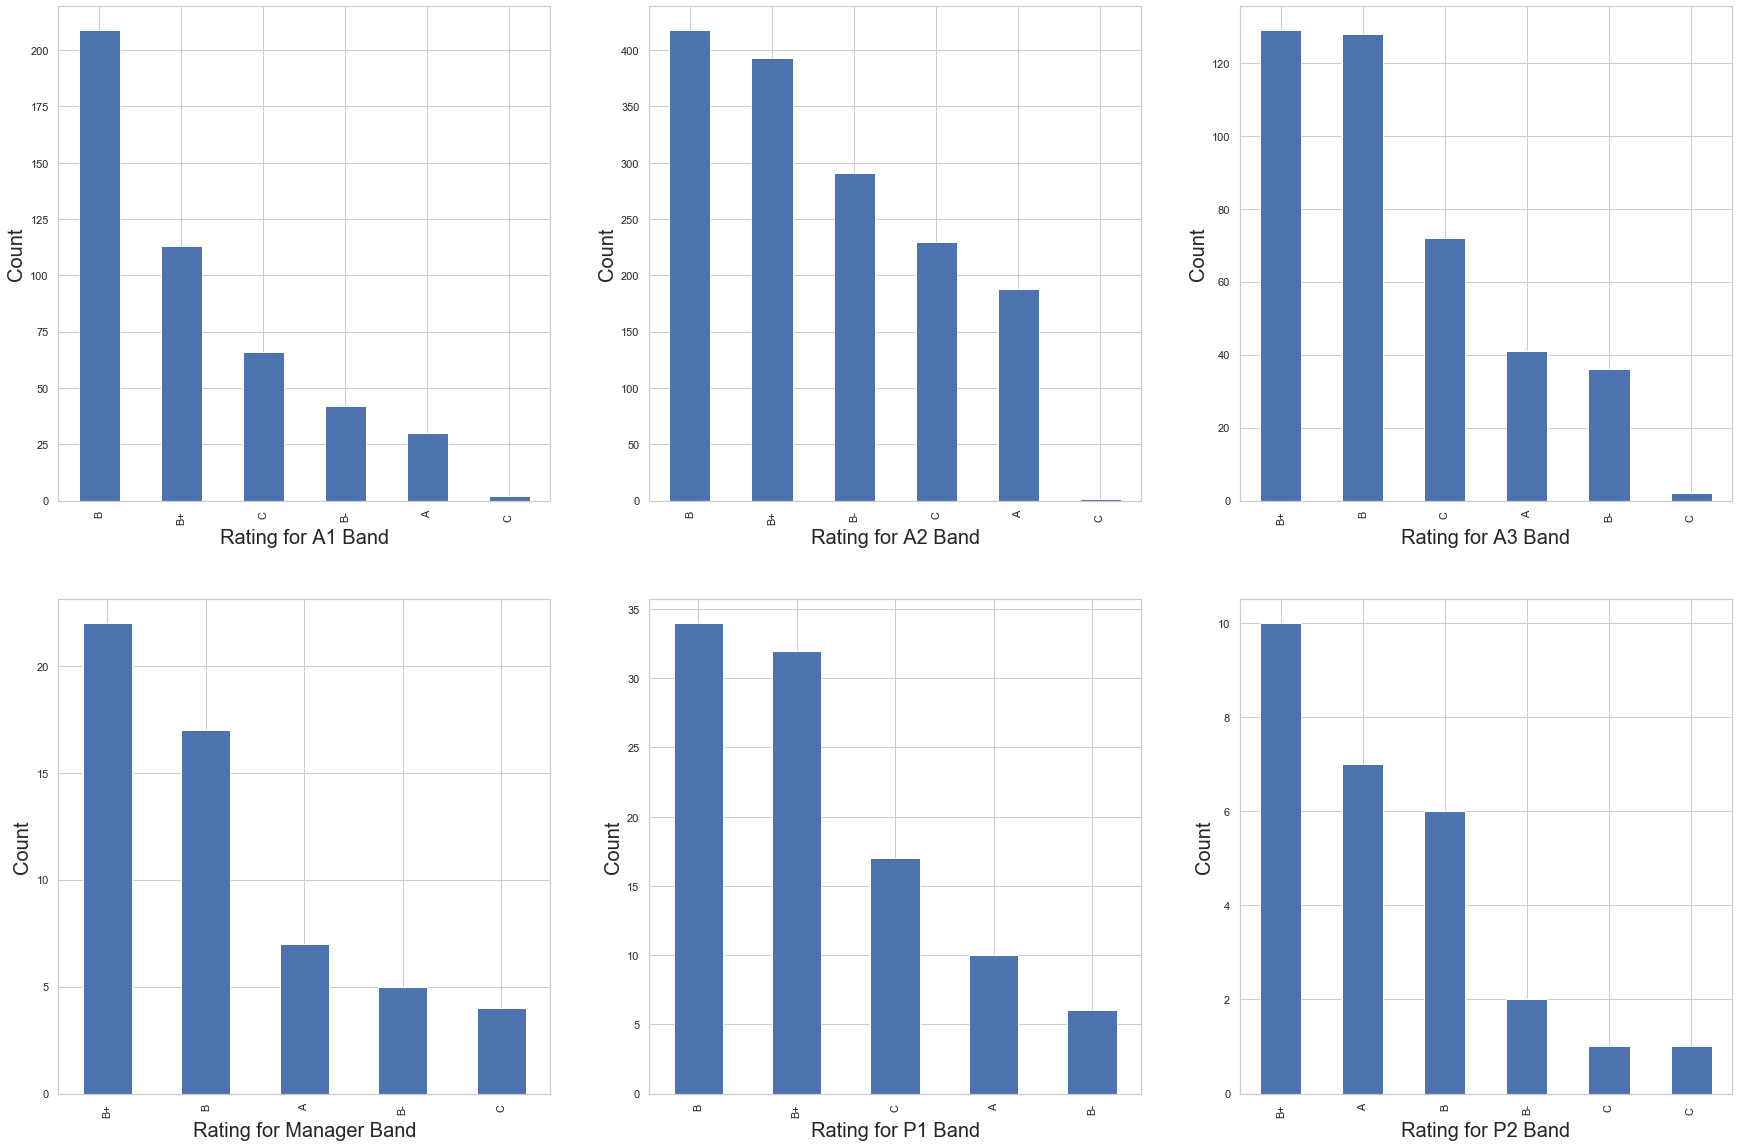

In [267]:
plt.subplots(figsize=(30,20)) 
plt.subplot(2,3,1)
A1['Rating'].describe()
A1['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A1 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,2)
A2['Rating'].describe()
A2['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A2 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,3)
A3['Rating'].describe()
A3['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A3 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,4)
Manager['Rating'].describe()
Manager['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for Manager Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,5)
P1['Rating'].describe()
P1['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for P1 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,6)
P2['Rating'].describe()
P2['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for P2 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)

#### Bands A3,Manager,P2 have the highest perfomance rating > 'B+'
#### P2 has the best perfomance average

In [268]:
data.head()

,Emp code,Employee Name,Designation,Process,COE(Decision yet to be taken),Date Of Joining,Cleaned_Date Of Joining(Epoch time stamp),Date of Resignation(derivation needed),Date of Attrition(derivation needed),LWD(derivation needed),LWD_Epoch_timestamp,Tenure(derivation needed),Pre joining exp,Fresher,Previous Company,Graduation_Cleaned,Post Graduation_cleaned,Diploma_cleaned,Others_cleaned,Raw Master Category_cleaned,Notice period served,Voluntary / Forced,Gender,Rating,Band,Company,Business,toatl leave,Total leaves in last 3 months,Interim Manager,Last Shifts for person,No.of Transfers,Deparment,Permanent Address,Perm_Latitude(Model inclusion not permitted),Perm_Longitude(Model inclusion not permitted),Date.of.Attrition(clean)
0,400001123,Sswvtz Pzwznr,Finance Controller,Finance,Rzqvss psznnz,2/14/2007,1.171411e+09,NaN,8/31/2007 0:00,8/31/2007,1188518400,155.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Personal,0,NaN,F,NaN,A2,R1 RCM India,Support,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Support,"P3B â 106 Princeton Estate, DLF Phase Five ...",28.447799,77.095438,8/31/2007
1,400005123,zwrtr yzqzq,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,2/12/2008 0:00,2/22/2008,1203638400,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Health,0,NaN,F,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...",28.604539,77.053158,2/12/2008
2,400006123,zssrss nvstz,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,9/9/2007 0:00,9/7/2007,1189123200,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"A-80, Palam Vihar 0 Phone: Mobile:9.911...",28.513878,77.023693,9/9/2007
3,400007123,zqzy Przszw,Analyst,Underpayments,NaN,3/7/2007,1.173226e+09,NaN,1/7/2007 0:00,6/30/2007,1183161600,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"293/2 WAC, Subroto Park 0 Phone: Mobile...",28.579781,77.151392,1/7/2007
4,400009123,Runrt Srnts,Assistant Manager,Quality,zssrss punzr zttzrwzo,3/5/2007,1.173053e+09,4/10/2011 0:00,5/4/2011 0:00,5/2/2011,1304294400,154.0,NaN,1,NaN,No details,No details,no details,no details,No data available,0,V,M,NaN,P1,R1 RCM India,Quality,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Quality,"320 â D, J & K Pocket, Dilshad Garden 0 ...",28.681713,77.325981,5/4/2011


In [269]:
data[['data_month','data_day','data_year']]=data['Date.of.Attrition(clean)'].str.split('/',expand=True)

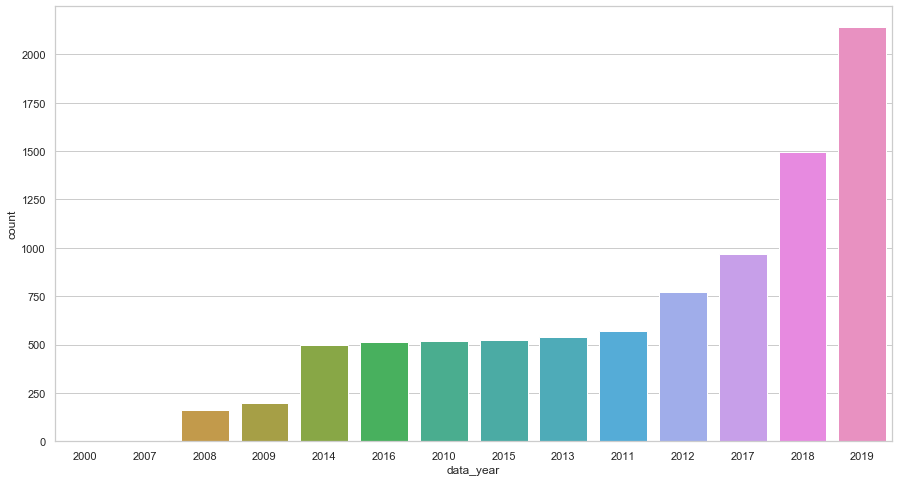

In [270]:
plt.subplots(figsize=(15,8))
sns.set(style="whitegrid")
ax = sns.countplot(x='data_year',order = data['data_year'].value_counts(ascending=True).index,
                   data=data)
#ax.legend(loc='upper left')
plt.show()

### No mathematical relation found between years and attrition rate!

In [271]:
data.head()

,Emp code,Employee Name,Designation,Process,COE(Decision yet to be taken),Date Of Joining,Cleaned_Date Of Joining(Epoch time stamp),Date of Resignation(derivation needed),Date of Attrition(derivation needed),LWD(derivation needed),LWD_Epoch_timestamp,Tenure(derivation needed),Pre joining exp,Fresher,Previous Company,Graduation_Cleaned,Post Graduation_cleaned,Diploma_cleaned,Others_cleaned,Raw Master Category_cleaned,Notice period served,Voluntary / Forced,Gender,Rating,Band,Company,Business,toatl leave,Total leaves in last 3 months,Interim Manager,Last Shifts for person,No.of Transfers,Deparment,Permanent Address,Perm_Latitude(Model inclusion not permitted),Perm_Longitude(Model inclusion not permitted),Date.of.Attrition(clean),data_month,data_day,data_year
0,400001123,Sswvtz Pzwznr,Finance Controller,Finance,Rzqvss psznnz,2/14/2007,1.171411e+09,NaN,8/31/2007 0:00,8/31/2007,1188518400,155.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Personal,0,NaN,F,NaN,A2,R1 RCM India,Support,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Support,"P3B â 106 Princeton Estate, DLF Phase Five ...",28.447799,77.095438,8/31/2007,8,31,2007
1,400005123,zwrtr yzqzq,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,2/12/2008 0:00,2/22/2008,1203638400,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Health,0,NaN,F,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...",28.604539,77.053158,2/12/2008,2,12,2008
2,400006123,zssrss nvstz,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,9/9/2007 0:00,9/7/2007,1189123200,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"A-80, Palam Vihar 0 Phone: Mobile:9.911...",28.513878,77.023693,9/9/2007,9,9,2007
3,400007123,zqzy Przszw,Analyst,Underpayments,NaN,3/7/2007,1.173226e+09,NaN,1/7/2007 0:00,6/30/2007,1183161600,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"293/2 WAC, Subroto Park 0 Phone: Mobile...",28.579781,77.151392,1/7/2007,1,7,2007
4,400009123,Runrt Srnts,Assistant Manager,Quality,zssrss punzr zttzrwzo,3/5/2007,1.173053e+09,4/10/2011 0:00,5/4/2011 0:00,5/2/2011,1304294400,154.0,NaN,1,NaN,No details,No details,no details,no details,No data available,0,V,M,NaN,P1,R1 RCM India,Quality,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Quality,"320 â D, J & K Pocket, Dilshad Garden 0 ...",28.681713,77.325981,5/4/2011,5,4,2011


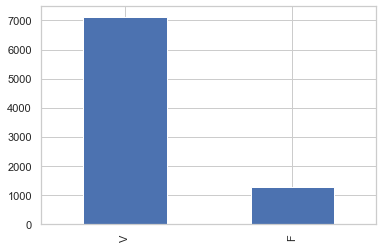

In [272]:
attrition_type = data[data['Voluntary / Forced'].notnull()]
attrition_type['Voluntary / Forced'].value_counts().plot(kind='bar')

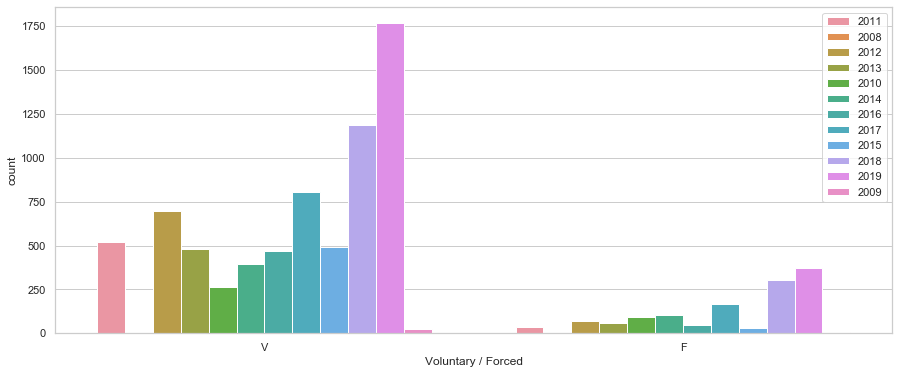

In [273]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Voluntary / Forced',hue='data_year',data=attrition_type)
ax.legend(loc='upper right')
plt.show()

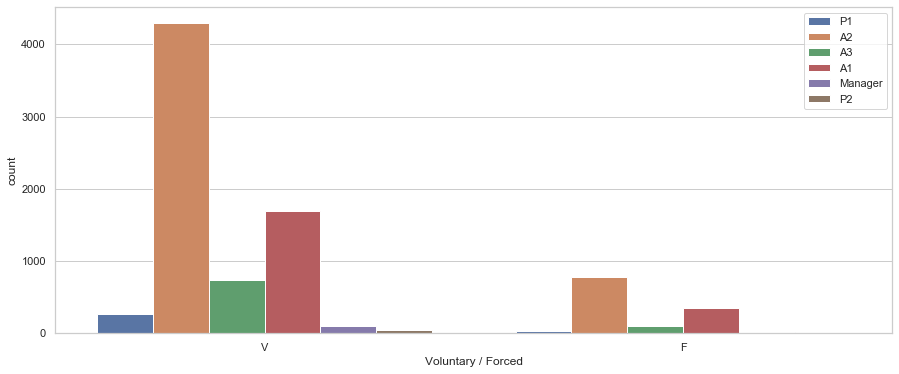

In [274]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Voluntary / Forced',hue='Band',data=attrition_type)
ax.legend(loc='upper right')
plt.show()

In [275]:
key='pk.eyJ1IjoibWhhdHJlYXB1cnZhIiwiYSI6ImNrNzZsejZteDBkOHMzZHJvaHdsZmliY3oifQ.24LeCR81rwaU9Y2sujou4Q'
fig = px.scatter_mapbox(data, lat="Perm_Latitude(Model inclusion not permitted)", lon="Perm_Longitude(Model inclusion not permitted)",color='Gender', 
                        hover_name="Emp code", hover_data=["Rating","Band"], zoom=3, height=500)
fig.update_layout(mapbox_style="basic", mapbox_accesstoken=key)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [276]:
key='pk.eyJ1IjoibWhhdHJlYXB1cnZhIiwiYSI6ImNrNzZsejZteDBkOHMzZHJvaHdsZmliY3oifQ.24LeCR81rwaU9Y2sujou4Q'
fig = px.scatter_mapbox(data_rating, lat="Perm_Latitude(Model inclusion not permitted)", lon="Perm_Longitude(Model inclusion not permitted)",color='Rating', 
                        hover_name="Emp code", hover_data=["Rating","Band"], zoom=3, height=500)
fig.update_layout(mapbox_style="basic", mapbox_accesstoken=key)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### No geographical trends were found w.r.t rating!

In [277]:
join_leave = data[data['Date Of Joining'].notnull()]
join_leave = data[data['Date.of.Attrition(clean)'].notnull()]

In [278]:
join_leave.head()

,Emp code,Employee Name,Designation,Process,COE(Decision yet to be taken),Date Of Joining,Cleaned_Date Of Joining(Epoch time stamp),Date of Resignation(derivation needed),Date of Attrition(derivation needed),LWD(derivation needed),LWD_Epoch_timestamp,Tenure(derivation needed),Pre joining exp,Fresher,Previous Company,Graduation_Cleaned,Post Graduation_cleaned,Diploma_cleaned,Others_cleaned,Raw Master Category_cleaned,Notice period served,Voluntary / Forced,Gender,Rating,Band,Company,Business,toatl leave,Total leaves in last 3 months,Interim Manager,Last Shifts for person,No.of Transfers,Deparment,Permanent Address,Perm_Latitude(Model inclusion not permitted),Perm_Longitude(Model inclusion not permitted),Date.of.Attrition(clean),data_month,data_day,data_year
0,400001123,Sswvtz Pzwznr,Finance Controller,Finance,Rzqvss psznnz,2/14/2007,1.171411e+09,NaN,8/31/2007 0:00,8/31/2007,1188518400,155.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Personal,0,NaN,F,NaN,A2,R1 RCM India,Support,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Support,"P3B â 106 Princeton Estate, DLF Phase Five ...",28.447799,77.095438,8/31/2007,8,31,2007
1,400005123,zwrtr yzqzq,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,2/12/2008 0:00,2/22/2008,1203638400,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Health,0,NaN,F,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...",28.604539,77.053158,2/12/2008,2,12,2008
2,400006123,zssrss nvstz,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,9/9/2007 0:00,9/7/2007,1189123200,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"A-80, Palam Vihar 0 Phone: Mobile:9.911...",28.513878,77.023693,9/9/2007,9,9,2007
3,400007123,zqzy Przszw,Analyst,Underpayments,NaN,3/7/2007,1.173226e+09,NaN,1/7/2007 0:00,6/30/2007,1183161600,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"293/2 WAC, Subroto Park 0 Phone: Mobile...",28.579781,77.151392,1/7/2007,1,7,2007
4,400009123,Runrt Srnts,Assistant Manager,Quality,zssrss punzr zttzrwzo,3/5/2007,1.173053e+09,4/10/2011 0:00,5/4/2011 0:00,5/2/2011,1304294400,154.0,NaN,1,NaN,No details,No details,no details,no details,No data available,0,V,M,NaN,P1,R1 RCM India,Quality,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Quality,"320 â D, J & K Pocket, Dilshad Garden 0 ...",28.681713,77.325981,5/4/2011,5,4,2011


In [279]:
join_leave[['data_join_month','data_join_day','data_join_year']]=join_leave['Date Of Joining'].str.split('/',expand=True)


C:\Users\USER\Anaconda3.1\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [280]:
join_leave.head()

,Emp code,Employee Name,Designation,Process,COE(Decision yet to be taken),Date Of Joining,Cleaned_Date Of Joining(Epoch time stamp),Date of Resignation(derivation needed),Date of Attrition(derivation needed),LWD(derivation needed),LWD_Epoch_timestamp,Tenure(derivation needed),Pre joining exp,Fresher,Previous Company,Graduation_Cleaned,Post Graduation_cleaned,Diploma_cleaned,Others_cleaned,Raw Master Category_cleaned,Notice period served,Voluntary / Forced,Gender,Rating,Band,Company,Business,toatl leave,Total leaves in last 3 months,Interim Manager,Last Shifts for person,No.of Transfers,Deparment,Permanent Address,Perm_Latitude(Model inclusion not permitted),Perm_Longitude(Model inclusion not permitted),Date.of.Attrition(clean),data_month,data_day,data_year,data_join_month,data_join_day,data_join_year
0,400001123,Sswvtz Pzwznr,Finance Controller,Finance,Rzqvss psznnz,2/14/2007,1.171411e+09,NaN,8/31/2007 0:00,8/31/2007,1188518400,155.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Personal,0,NaN,F,NaN,A2,R1 RCM India,Support,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Support,"P3B â 106 Princeton Estate, DLF Phase Five ...",28.447799,77.095438,8/31/2007,8,31,2007,2,14,2007
1,400005123,zwrtr yzqzq,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,2/12/2008 0:00,2/22/2008,1203638400,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Health,0,NaN,F,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...",28.604539,77.053158,2/12/2008,2,12,2008,3,5,2007
2,400006123,zssrss nvstz,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,9/9/2007 0:00,9/7/2007,1189123200,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"A-80, Palam Vihar 0 Phone: Mobile:9.911...",28.513878,77.023693,9/9/2007,9,9,2007,3,5,2007
3,400007123,zqzy Przszw,Analyst,Underpayments,NaN,3/7/2007,1.173226e+09,NaN,1/7/2007 0:00,6/30/2007,1183161600,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"293/2 WAC, Subroto Park 0 Phone: Mobile...",28.579781,77.151392,1/7/2007,1,7,2007,3,7,2007
4,400009123,Runrt Srnts,Assistant Manager,Quality,zssrss punzr zttzrwzo,3/5/2007,1.173053e+09,4/10/2011 0:00,5/4/2011 0:00,5/2/2011,1304294400,154.0,NaN,1,NaN,No details,No details,no details,no details,No data available,0,V,M,NaN,P1,R1 RCM India,Quality,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Quality,"320 â D, J & K Pocket, Dilshad Garden 0 ...",28.681713,77.325981,5/4/2011,5,4,2011,3,5,2007


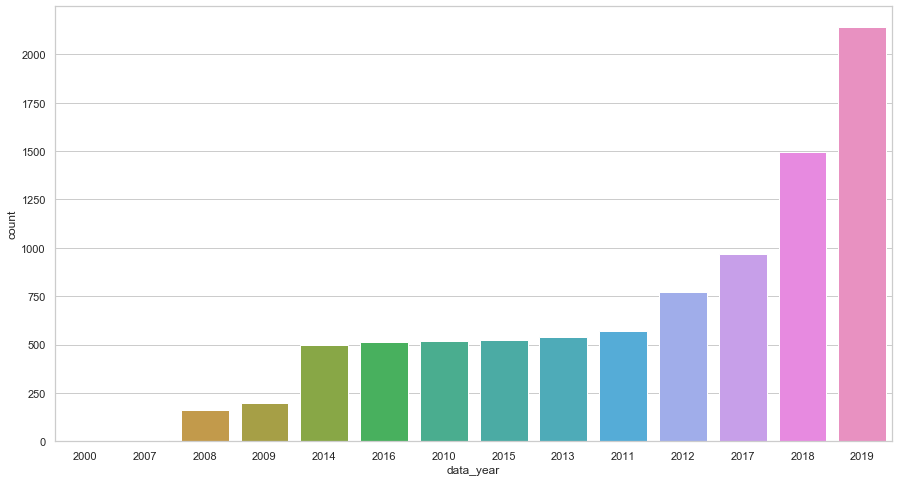

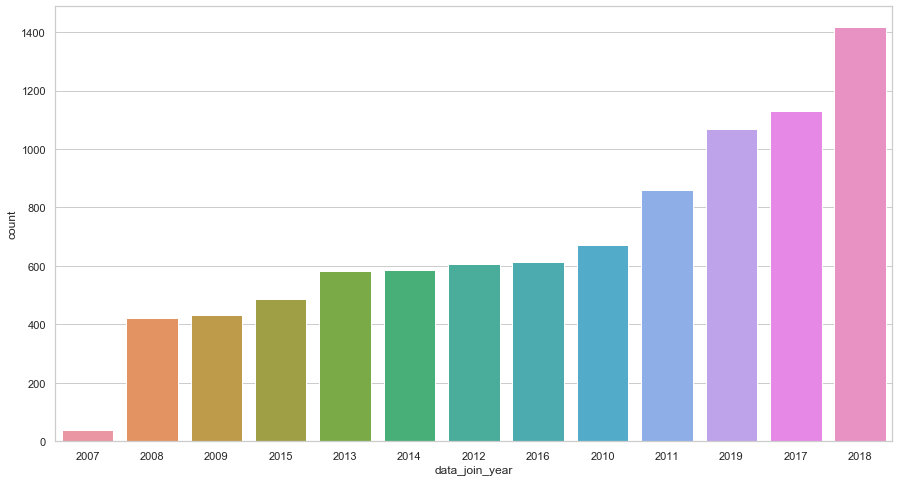

In [281]:
plt.subplots(figsize=(15,8))
sns.set(style="whitegrid")
ax = sns.countplot(x='data_year',order = data['data_year'].value_counts(ascending=True).index,
                   data=data)
#ax.legend(loc='upper left')
plt.show()
plt.subplots(figsize=(15,8))
sns.set(style="whitegrid")
ax = sns.countplot(x='data_join_year',order = join_leave['data_join_year'].value_counts(ascending=True).index,
                   data=join_leave)
#ax.legend(loc='upper left')
plt.show()

In [282]:
join_leave['Working Tenure'] = (pd.to_datetime(join_leave['Date.of.Attrition(clean)'])-pd.to_datetime(join_leave['Date Of Joining'])).dt.days

C:\Users\USER\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [283]:
join_leave=join_leave.reset_index()
join_leave.head()

,index,Emp code,Employee Name,Designation,Process,COE(Decision yet to be taken),Date Of Joining,Cleaned_Date Of Joining(Epoch time stamp),Date of Resignation(derivation needed),Date of Attrition(derivation needed),LWD(derivation needed),LWD_Epoch_timestamp,Tenure(derivation needed),Pre joining exp,Fresher,Previous Company,Graduation_Cleaned,Post Graduation_cleaned,Diploma_cleaned,Others_cleaned,Raw Master Category_cleaned,Notice period served,Voluntary / Forced,Gender,Rating,Band,Company,Business,toatl leave,Total leaves in last 3 months,Interim Manager,Last Shifts for person,No.of Transfers,Deparment,Permanent Address,Perm_Latitude(Model inclusion not permitted),Perm_Longitude(Model inclusion not permitted),Date.of.Attrition(clean),data_month,data_day,data_year,data_join_month,data_join_day,data_join_year,Working Tenure
0,0,400001123,Sswvtz Pzwznr,Finance Controller,Finance,Rzqvss psznnz,2/14/2007,1.171411e+09,NaN,8/31/2007 0:00,8/31/2007,1188518400,155.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Personal,0,NaN,F,NaN,A2,R1 RCM India,Support,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Support,"P3B â 106 Princeton Estate, DLF Phase Five ...",28.447799,77.095438,8/31/2007,8,31,2007,2,14,2007,198
1,1,400005123,zwrtr yzqzq,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,2/12/2008 0:00,2/22/2008,1203638400,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Health,0,NaN,F,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...",28.604539,77.053158,2/12/2008,2,12,2008,3,5,2007,344
2,2,400006123,zssrss nvstz,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,9/9/2007 0:00,9/7/2007,1189123200,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"A-80, Palam Vihar 0 Phone: Mobile:9.911...",28.513878,77.023693,9/9/2007,9,9,2007,3,5,2007,188
3,3,400007123,zqzy Przszw,Analyst,Underpayments,NaN,3/7/2007,1.173226e+09,NaN,1/7/2007 0:00,6/30/2007,1183161600,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"293/2 WAC, Subroto Park 0 Phone: Mobile...",28.579781,77.151392,1/7/2007,1,7,2007,3,7,2007,-59
4,4,400009123,Runrt Srnts,Assistant Manager,Quality,zssrss punzr zttzrwzo,3/5/2007,1.173053e+09,4/10/2011 0:00,5/4/2011 0:00,5/2/2011,1304294400,154.0,NaN,1,NaN,No details,No details,no details,no details,No data available,0,V,M,NaN,P1,R1 RCM India,Quality,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Quality,"320 â D, J & K Pocket, Dilshad Garden 0 ...",28.681713,77.325981,5/4/2011,5,4,2011,3,5,2007,1521


#### Let's try to switch to tenure which is another important attribute!

In [284]:
join_leave['Working Tenure'].describe()

count    8914.000000
mean      378.349114
std       443.728282
min     -3015.000000
25%        84.000000
50%       229.500000
75%       509.000000
max      3557.000000
Name: Working Tenure, dtype: float64

In [285]:
join_leave.head()

,index,Emp code,Employee Name,Designation,Process,COE(Decision yet to be taken),Date Of Joining,Cleaned_Date Of Joining(Epoch time stamp),Date of Resignation(derivation needed),Date of Attrition(derivation needed),LWD(derivation needed),LWD_Epoch_timestamp,Tenure(derivation needed),Pre joining exp,Fresher,Previous Company,Graduation_Cleaned,Post Graduation_cleaned,Diploma_cleaned,Others_cleaned,Raw Master Category_cleaned,Notice period served,Voluntary / Forced,Gender,Rating,Band,Company,Business,toatl leave,Total leaves in last 3 months,Interim Manager,Last Shifts for person,No.of Transfers,Deparment,Permanent Address,Perm_Latitude(Model inclusion not permitted),Perm_Longitude(Model inclusion not permitted),Date.of.Attrition(clean),data_month,data_day,data_year,data_join_month,data_join_day,data_join_year,Working Tenure
0,0,400001123,Sswvtz Pzwznr,Finance Controller,Finance,Rzqvss psznnz,2/14/2007,1.171411e+09,NaN,8/31/2007 0:00,8/31/2007,1188518400,155.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Personal,0,NaN,F,NaN,A2,R1 RCM India,Support,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Support,"P3B â 106 Princeton Estate, DLF Phase Five ...",28.447799,77.095438,8/31/2007,8,31,2007,2,14,2007,198
1,1,400005123,zwrtr yzqzq,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,2/12/2008 0:00,2/22/2008,1203638400,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Health,0,NaN,F,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...",28.604539,77.053158,2/12/2008,2,12,2008,3,5,2007,344
2,2,400006123,zssrss nvstz,Analyst,Underpayments,NaN,3/5/2007,1.173053e+09,NaN,9/9/2007 0:00,9/7/2007,1189123200,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"A-80, Palam Vihar 0 Phone: Mobile:9.911...",28.513878,77.023693,9/9/2007,9,9,2007,3,5,2007,188
3,3,400007123,zqzy Przszw,Analyst,Underpayments,NaN,3/7/2007,1.173226e+09,NaN,1/7/2007 0:00,6/30/2007,1183161600,154.0,NaN,1,NaN,NaN,NaN,NaN,NaN,Better opportunity,0,NaN,M,NaN,A2,R1 RCM India,Operations,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Operations,"293/2 WAC, Subroto Park 0 Phone: Mobile...",28.579781,77.151392,1/7/2007,1,7,2007,3,7,2007,-59
4,4,400009123,Runrt Srnts,Assistant Manager,Quality,zssrss punzr zttzrwzo,3/5/2007,1.173053e+09,4/10/2011 0:00,5/4/2011 0:00,5/2/2011,1304294400,154.0,NaN,1,NaN,No details,No details,no details,no details,No data available,0,V,M,NaN,P1,R1 RCM India,Quality,0.0,0.0,Yzwvrnwvr Srnts qzspzo,3:00 PM - 12:00 AM,0.0,Quality,"320 â D, J & K Pocket, Dilshad Garden 0 ...",28.681713,77.325981,5/4/2011,5,4,2011,3,5,2007,1521
